In [1]:
#pip install scipy Pillow matplotlib

In [2]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [3]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
if os.path.basename(cwd) == 'Parking test 1':
    root_path = os.path.dirname(cwd) # Go up to main folder
else:
    root_path = cwd

# 2. Define the correct folder paths
train_path = os.path.join(root_path, 'train_data', 'train_data', 'train')
test_path = os.path.join(root_path, 'train_data', 'train_data', 'test')

def count_files(base_folder):
    total = 0
    if not os.path.exists(base_folder):
        print(f"Directory not found: {base_folder}")
        return 0

    # Loop through sub-folders (like 'empty' and 'occupied')
    for sub in os.listdir(base_folder):
        sub_path = os.path.join(base_folder, sub)
        if os.path.isdir(sub_path):
            # Count only files inside each sub-folder
            files = [f for f in os.listdir(sub_path) if os.path.isfile(os.path.join(sub_path, f))]
            total += len(files)
    return total
# 3. Calculate and print results
files_train = count_files(train_path)
files_validation = count_files(test_path)
print(f"Training files: {files_train}")
print(f"Validation files: {files_validation}")

Training files: 468
Validation files: 182


Set key parameters

In [4]:
img_width, img_height = 48,48
train_data_dir = train_path
validation_data_dir = test_path
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [5]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

In [6]:
model.layers

In [7]:
for layer in model.layers[:10]:
    layer.traiable = False

In [8]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(lr = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

c:\Users\zulfadhliwza\AppData\Local\anaconda3\envs\parkingenv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Data Augumentation

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 468 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [10]:
history = model_final.fit_generator(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

C:\Users\zulfadhliwza\AppData\Local\Temp\ipykernel_2980\31626457.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_final.fit_generator(


Epoch 1/15
14/14 [==============================] - 20s 1s/step - loss: 0.5534 - accuracy: 0.6606 - val_loss: 0.4453 - val_accuracy: 0.7563
Epoch 2/15
14/14 [==============================] - 18s 1s/step - loss: 0.3095 - accuracy: 0.8349 - val_loss: 0.3022 - val_accuracy: 0.8813
Epoch 3/15
14/14 [==============================] - 18s 1s/step - loss: 0.2011 - accuracy: 0.9495 - val_loss: 0.2270 - val_accuracy: 0.9438
Epoch 4/15
14/14 [==============================] - 17s 1s/step - loss: 0.1590 - accuracy: 0.9427 - val_loss: 0.2509 - val_accuracy: 0.9000
Epoch 5/15
14/14 [==============================] - 17s 1s/step - loss: 0.1284 - accuracy: 0.9587 - val_loss: 0.2269 - val_accuracy: 0.9125
Epoch 6/15
14/14 [==============================] - 17s 1s/step - loss: 0.1189 - accuracy: 0.9541 - val_loss: 0.2230 - val_accuracy: 0.9187
Epoch 7/15
14/14 [==============================] - 17s 1s/step - loss: 0.0915 - accuracy: 0.9771 - val_loss: 0.1863 - val_accuracy: 0.9250
Epoch 8/15
14/14 [==

In [ ]:
#history.history

{'loss': [0.5533695220947266,
  0.3095179498195648,
  0.2011006772518158,
  0.1590169221162796,
  0.128397598862648,
  0.11889107525348663,
  0.09151727706193924,
  0.0797489583492279,
  0.0689060240983963,
  0.07273134589195251,
  0.05792903155088425,
  0.057170018553733826,
  0.04914087802171707,
  0.048922039568424225,
  0.048702172935009],
 'accuracy': [0.6605504751205444,
  0.8348624110221863,
  0.9495412707328796,
  0.9426605701446533,
  0.9587156176567078,
  0.9541284441947937,
  0.9770641922950745,
  0.9839449524879456,
  0.9793577790260315,
  0.9724770784378052,
  0.9770641922950745,
  0.9793577790260315,
  0.9793577790260315,
  0.9862385392189026,
  0.9839449524879456],
 'val_loss': [0.44525113701820374,
  0.3022385537624359,
  0.22698445618152618,
  0.25087204575538635,
  0.22688408195972443,
  0.2230185568332672,
  0.1863120198249817,
  0.19814130663871765,
  0.15195873379707336,
  0.13351747393608093,
  0.17475613951683044,
  0.17393144965171814,
  0.15981397032737732,
  0

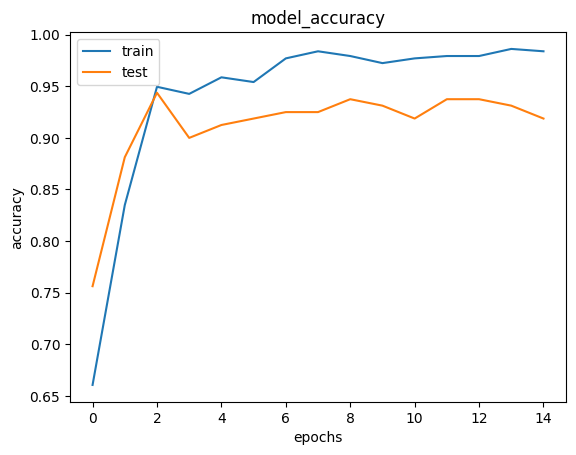

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

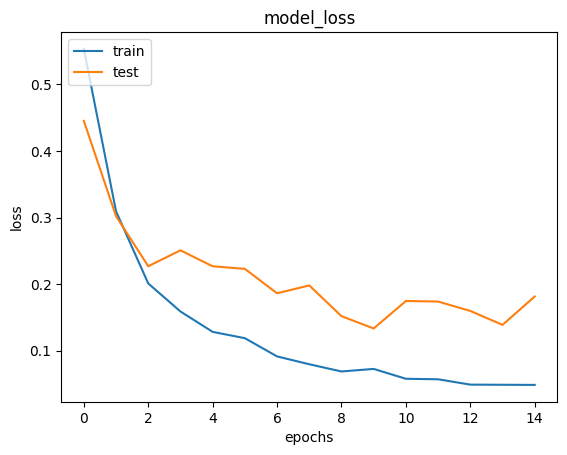

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [14]:
model_final.save('model_final.h5')

In [15]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [16]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [17]:
import cv2

In [18]:
def make_prediction(image):
    img_data = cv2.imread(image)
    
    # Check if image was loaded successfully
    if img_data is None:
        print(f"Error: Could not read image from {image}")
        return None
        
    image = cv2.resize(img_data, (48, 48))
    img = image/255
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [19]:
make_prediction("cropped_img2/roi_1.png")

1/1 [==============================] - 0s 155ms/step


'car'

In [26]:
make_prediction("cropped_img2/roi_11.png")

1/1 [==============================] - 0s 31ms/step


'no_car'

In [21]:
model_final.save("model_final.h5")

In [22]:
make_prediction("testspot2.jpeg")

1/1 [==============================] - 0s 29ms/step


'no_car'

In [23]:
make_prediction("testspot1.jpg")

1/1 [==============================] - 0s 30ms/step


'no_car'

In [47]:
save_path = "cropped_img2/roi_1.png"

def brightnessimg(image,brightness=2.0):
    img_data = cv2.imread(image)    
    img_data = cv2.convertScaleAbs(img_data, alpha=brightness, beta=0)
    cv2.imwrite(save_path, img_data)
    print(f'saved slanted crop: {save_path}')
    return img_data

In [48]:
brightnessimg("cropped_img2/roi_11.png")

saved slanted crop: cropped_img2/roi_1.png


array([[[124, 104, 116],
        [134, 114, 126],
        [122, 102, 114],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[126, 106, 118],
        [126, 106, 118],
        [112,  92, 104],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[114,  94, 106],
        [106,  86,  98],
        [ 92,  72,  84],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [102,  78,  98],
        [100,  78,  98],
        [ 94,  72,  92]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 68,  46,  66],
        [ 70,  48,  66],
        [ 68,  46,  64]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 70,  48,  66],
        [ 72,  50,  66],
        [ 72,  50,  66]]

In [42]:
make_prediction("test2.png")

1/1 [==============================] - 0s 38ms/step


'car'

In [ ]:
def make_prediction(image, brightness=1.0):
    if isinstance(image, str):
        img_data = cv2.imread(image)
    else:
        img_data = image
    
    # Check if image was loaded successfully
    if img_data is None:
        print(f"Error: Could not read image")
        return None
    
    # Adjust brightness
    if brightness != 1.0:
        img_data = cv2.convertScaleAbs(img_data, alpha=brightness, beta=0)
        
    image_resized = cv2.resize(img_data, (48, 48))
    img = image_resized/255.0
    img = np.expand_dims(img, axis=0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label